In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip
import json
import faker
fake = faker.Faker()

In [3]:
a = [random.gauss(mu = 0  , sigma = 1) for _ in range(1000)]
b = [random.gauss(mu = -10, sigma = 1) for _ in range(1000)]
c = [random.gauss(mu = 10 , sigma = 1) for _ in range(1000)]

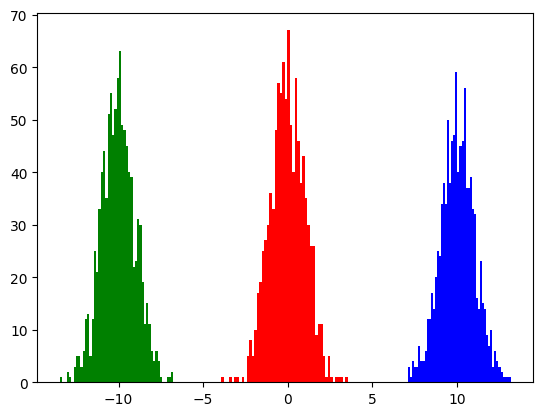

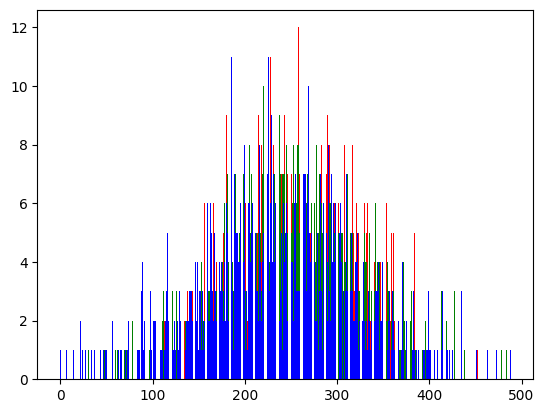

In [4]:
plt.hist(x = a, bins = 50, color = 'red')
plt.hist(x = b, bins = 50, color = 'green')
plt.hist(x = c, bins = 50, color = 'blue')
plt.show()
hist, bins = np.histogram(a, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'red')
hist, bins = np.histogram(b, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'green')
hist, bins = np.histogram(c, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'blue')
plt.show()

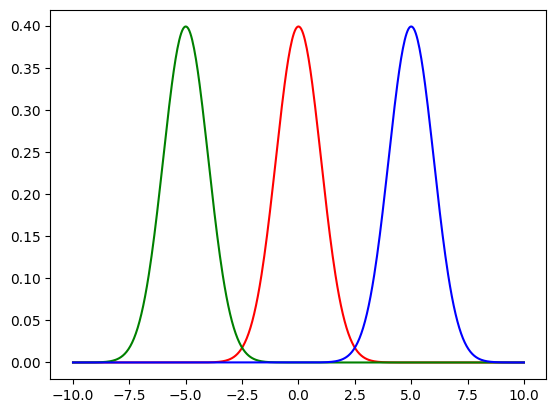

In [5]:
from scipy.stats import norm
x = np.linspace(-10, 10, 489)
a = norm.pdf(x, loc=0, scale=1)   # Group 1
plt.plot(x, a, c = 'red')
b = norm.pdf(x, loc =-5, scale=1) # Group 2
plt.plot(x, b, c = 'green')
c = norm.pdf(x, loc = 5, scale=1) # Group 3
plt.plot(x, c, c = 'blue')
plt.show()

In [ ]:
df = pd.read_csv('../Data/Final_Events.csv')
df.shape[0]

489

In [12]:
clicked_items = df.sample(n = 500, replace = True, weights = a, random_state=42)['Title'].index.value_counts().to_dict()

In [ ]:
#fake.date_of_birth()
user_data = {}

'vargasmelissa'

In [111]:
def write_comp_json(data: dict, FileName: str) -> None:
    with gzip.open(FileName, 'w') as fout:
        fout.write(json.dumps(data).encode('utf-8'))  
        
def read_comp_json(FileName: str) -> None:
    with gzip.open(FileName, 'r') as fin:
        data = json.loads(fin.read().decode('utf-8'))
    return data

In [26]:
user_data = {}

for _ in range(100):
    for distr in [a,b,c]:
        user_data[fake.user_name()] = {
            "NAME" : fake.name(),
            "EMAIL": fake.email(),
            "CELL" : fake.phone_number(),
            "CLICKED" :  df.sample(n = 500, 
                                   replace = True, 
                                   weights = distr, 
                                   random_state=42
                                   )['Title'].index.value_counts().to_dict()
        }

In [28]:
with open('User_Data.json', 'w', encoding='utf-8') as f:
    json.dump(user_data, f, ensure_ascii=False, indent=4)